<a href="https://colab.research.google.com/github/Satish055/Shanumukh/blob/main/Loan_Status_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
# Import necessary libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Displaying the Data Types in Dataset**

In [103]:
# datatypes
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


# **Finding the Null values in dataset**

In [104]:
# Finding for Null values
df.isnull().sum()*100/len(df)

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


**Describing the dataset**

In [52]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Shape of the Dataset**



In [53]:
df.shape

(614, 13)

**HANDLING THE MISSING VALUES**

In [109]:
df.drop("Loan_ID",axis=1, inplace=True)

In [110]:
columns =['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [111]:
df=df.dropna(subset=columns)

In [112]:
df.isnull().sum()*100/len(df)

,0
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,5.424955
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,0.000000
Loan_Amount_Term,0.000000
Credit_History,8.679928


In [113]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit_transform(df[['Credit_History','Self_Employed']])
df[['Credit_History','Self_Employed']] = imputer.fit_transform(df[['Credit_History','Self_Employed']])

In [114]:
df.isnull().sum()*100/len(df)

,0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0
Credit_History,0.0


**HANDLING CATEGORICAL VALUES**

In [115]:
df.sample(4)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
219,Female,Yes,2,Graduate,No,4283,2383.0,127.0,360.0,1.0,Semiurban,Y
128,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N
278,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
384,Male,Yes,2,Graduate,No,4566,0.0,100.0,360.0,1.0,Urban,N


In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [117]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int64  
 1   Married            553 non-null    int64  
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    int64  
 4   Self_Employed      553 non-null    int64  
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    object 
 10  Property_Area      553 non-null    int64  
 11  Loan_Status        553 non-null    object 
dtypes: float64(3), int64(6), object(3)
memory usage: 72.3+ KB


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            553 non-null    object 
 1   Gender             553 non-null    int64  
 2   Married            553 non-null    int64  
 3   Dependents         553 non-null    object 
 4   Education          553 non-null    int64  
 5   Self_Employed      553 non-null    int64  
 6   ApplicantIncome    553 non-null    int64  
 7   CoapplicantIncome  553 non-null    float64
 8   LoanAmount         553 non-null    float64
 9   Loan_Amount_Term   553 non-null    float64
 10  Credit_History     553 non-null    int64  
 11  Property_Area      553 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 72.3+ KB


In [119]:
df['Dependents']=df['Dependents'].replace(to_replace="3+",value='4')

In [120]:
df['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [84]:
df['Credit_History']=df['Credit_History'].astype(int)

<Axes: xlabel='Married', ylabel='count'>

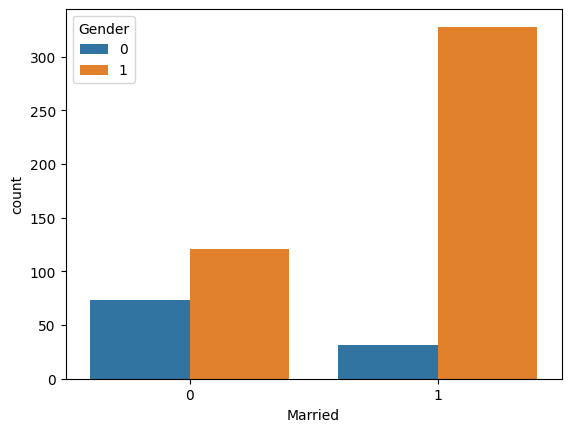

In [93]:
sns.countplot(x=df['Married'],data=df , hue='Gender')

In [91]:
df['Property_Area'].value_counts()

,count
Property_Area,
1,215
2,175
0,163


In [92]:
df.sample(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
233,LP001776,0,0,0,0,0,8333,0.0,280.0,360.0,1,1
393,LP002265,1,1,2,1,0,1993,1625.0,113.0,180.0,1,1
603,LP002958,1,0,0,0,0,3676,4301.0,172.0,360.0,1,0
598,LP002945,1,1,0,0,1,9963,0.0,180.0,360.0,1,0


In [121]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


**FEATURE ENGINEERING**

Diving into X and Y Variable

In [122]:
X=df.iloc[:,:-1].values

In [123]:
y=df.iloc[:,-1].values

In [124]:
X.shape

(553, 11)

In [125]:
y.shape

(553,)

In [127]:
X

array([[1, 1, '1', ..., 360.0, 1.0, 0],
       [1, 1, '0', ..., 360.0, 1.0, 2],
       [1, 1, '0', ..., 360.0, 1.0, 2],
       ...,
       [1, 1, '1', ..., 360.0, 1.0, 2],
       [1, 1, '2', ..., 360.0, 1.0, 2],
       [0, 0, '0', ..., 360.0, 0.0, 1]], dtype=object)

In [128]:
y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y

**FEATURE SCALING**

In [132]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X[:,5:9]=sc.fit_transform(X[:,5:9])

**Splitting dataset into training & test set**

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'{model} accuracy is {accuracy_score(y_test,y_pred)}')
    score=cross_val_score(model,X,y,cv=5)
    print(f'{model} Avg cross validation score is {np.mean(score)}')
    model_df[model]=round(np.mean(score)*100,2)



In [171]:
model_df

{SVC(): np.float64(79.21),
 DecisionTreeClassifier(): np.float64(69.98),
 RandomForestClassifier(): np.float64(78.85),
 GradientBoostingClassifier(): np.float64(77.58)}

In [138]:
X_train.shape

(442, 11)

In [140]:
X_test.shape

(111, 11)

In [141]:
y_train.shape

(442,)

In [142]:
y_test.shape

(111,)

**LOGISTIC REGRESSION**

In [144]:
model=LogisticRegression()

In [145]:
model_val(model,X,y)

LogisticRegression() accuracy is 0.8198198198198198
LogisticRegression() Avg cross validation score is 0.802964782964783


**SUPPORT VECTOR MACHINE**

In [149]:
from sklearn import svm
model=svm.SVC()

In [150]:
model_val(model,X,y)

SVC() accuracy is 0.8108108108108109
SVC() Avg cross validation score is 0.7920720720720721


**Decision Tree Classifier**

In [152]:
model=DecisionTreeClassifier()

In [153]:
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.7477477477477478
DecisionTreeClassifier() Avg cross validation score is 0.6997542997542997


**RandomForestClassifier**

In [154]:
model=RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7567567567567568
RandomForestClassifier() Avg cross validation score is 0.7884848484848483


**Gradient Boosting Classifier**

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.8018018018018018
GradientBoostingClassifier() Avg cross validation score is 0.7757739557739558


**Hyperparameter Tuning**

In [158]:
random_grid={'C':np.logspace(-4,4,20),'solver':['liblinear']}

In [160]:
from sklearn.model_selection import RandomizedSearchCV
model=RandomForestClassifier()
rs_cv=RandomizedSearchCV(LogisticRegression(),param_distributions=random_grid,n_iter=20,cv=5,verbose=True)
rs_cv.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [161]:
rs_cv.best_score_

np.float64(0.802964782964783)